In [59]:
# General data handling
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', 200)
import numpy as np

# Drawing plots
import matplotlib
import matplotlib.pyplot as plt


# Machine learning with scikit-learn
import sklearn
import sklearn.impute
import sklearn.model_selection
import sklearn.metrics
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


# System packages for saving Python ojects
import os
import pickle

# To understand the model
import shap

Part 1 - Load Data

In [2]:
# Reading File
dataset = pd.read_csv('data/Breast Cancer Wisconsin Diagnostic/wdbc.data')
display(dataset.shape)
display(dataset.columns.to_list())
display(dataset.head())
display(dataset.tail())

(568, 32)

['842302',
 'M',
 '17.99',
 '10.38',
 '122.8',
 '1001',
 '0.1184',
 '0.2776',
 '0.3001',
 '0.1471',
 '0.2419',
 '0.07871',
 '1.095',
 '0.9053',
 '8.589',
 '153.4',
 '0.006399',
 '0.04904',
 '0.05373',
 '0.01587',
 '0.03003',
 '0.006193',
 '25.38',
 '17.33',
 '184.6',
 '2019',
 '0.1622',
 '0.6656',
 '0.7119',
 '0.2654',
 '0.4601',
 '0.1189']

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [3]:
# Examine the distribution of the target feature Class
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
dataset = pd.read_csv('data/Breast Cancer Wisconsin Diagnostic/wdbc.data', header=None, names=columns)

target_feature = dataset['diagnosis'].value_counts()
display(target_feature)


diagnosis
B    357
M    212
Name: count, dtype: int64

Prepare Data for Modelling

In [4]:
# X descriptive features
X = dataset.drop(columns=['diagnosis']).set_index('id')
# Y target feature
Y = dataset.set_index('id')['diagnosis']

In [5]:
# Examine X dataFrame
X = dataset.set_index('id').drop(columns=['diagnosis'])
display(X.shape)
display(X.columns.to_list())
display(X.head(10))

(569, 30)

['feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30']

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [6]:
# Examine Y DataFrame
display(Y.shape)
display(Y.head(10))

(569,)

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
843786      M
844359      M
84458202    M
844981      M
84501001    M
Name: diagnosis, dtype: object

Partition Data

Create a training set and a validation set.

In [7]:
from sklearn.model_selection import train_test_split
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y,train_size = 0.7,stratify = Y)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,train_size = 0.7,shuffle = True, stratify = Y)

Examine the Partitions Created

In [8]:
# Examine the training set (X_train)
display(X_train.shape)
display(X_train.columns.tolist())
display(X_train.head(10))

(398, 30)

['feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30']

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
863270,12.36,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.010470,0.011670,0.005558,0.01251,0.001356,13.29,27.49,85.56,544.1,0.1184,0.1963,0.19370,0.08442,0.2983,0.07185
906290,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,0.2865,1.6780,1.9680,18.990,0.006908,0.009442,0.006972,0.006159,0.02694,0.002060,12.36,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123
848406,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.05259,0.1586,0.05922,0.4727,1.2400,3.1950,45.400,0.005718,0.011620,0.019980,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
9011494,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.164100,0.12650,0.1875,0.06020,0.9761,1.8920,7.1280,103.600,0.008439,0.046740,0.059040,0.025360,0.03710,0.004286,24.19,33.81,160.00,1671.0,0.1278,0.3416,0.37030,0.21520,0.3271,0.07632
919555,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.208500,0.13220,0.2127,0.06251,0.6986,0.9901,4.7060,87.780,0.004578,0.026160,0.040050,0.014210,0.01948,0.002689,24.30,25.48,160.20,1809.0,0.1268,0.3135,0.44330,0.21480,0.3077,0.07569
852973,15.30,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.08751,0.1926,0.06540,0.4390,1.0120,3.4980,43.500,0.005233,0.030570,0.035760,0.010830,0.01768,0.002967,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876
89382602,12.76,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.02548,0.1601,0.06140,0.3265,0.6594,2.3460,25.180,0.006494,0.027680,0.031370,0.010690,0.01731,0.004392,14.19,16.40,92.04,618.8,0.1194,0.2208,0.17690,0.08411,0.2564,0.08253
914062,18.01,20.56,118.40,1007.0,0.10010,0.12890,0.117000,0.07762,0.2116,0.06077,0.7548,1.2880,5.3530,89.740,0.007997,0.027000,0.037370,0.016480,0.02897,0.003996,21.53,26.06,143.40,1426.0,0.1309,0.2327,0.25440,0.14890,0.3251,0.07625
921385,11.54,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.02594,0.1818,0.06782,0.2784,1.7680,1.6280,20.860,0.012150,0.041120,0.055530,0.014940,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.17970,0.06918,0.2329,0.08134


In [9]:
# Examine the validation set (X_val)
display(X_val.shape)
display(X_val.head(10))

(171, 30)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
917080,12.750,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,0.3834,1.0030,2.495,28.62,0.007509,0.01561,0.01977,0.009199,0.01805,0.003629,14.45,21.74,93.63,624.1,0.1475,0.1979,0.14230,0.08045,0.3071,0.08557
899667,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,0.5204,1.3240,3.477,51.22,0.009329,0.06559,0.09953,0.022830,0.05543,0.007330,17.36,24.17,119.40,915.3,0.1550,0.5046,0.68720,0.21350,0.4245,0.10500
91376701,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.1390,1.577,18.04,0.005096,0.01205,0.00941,0.004551,0.01608,0.002399,14.17,31.99,92.74,622.9,0.1256,0.1804,0.12300,0.06335,0.3100,0.08203
861597,12.360,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,0.1930,0.06404,0.2978,1.5020,2.203,20.95,0.007112,0.02493,0.02703,0.012930,0.01958,0.004463,13.83,30.50,91.46,574.7,0.1304,0.2463,0.24340,0.12050,0.2972,0.09261
912193,12.160,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,0.06284,0.2194,1.1900,1.678,16.26,0.004911,0.01666,0.01397,0.005161,0.01454,0.001858,13.34,27.87,88.83,547.4,0.1208,0.2279,0.16200,0.05690,0.2406,0.07729
924632,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,0.2116,1.3600,1.502,16.83,0.008412,0.02153,0.03898,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242
862980,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,0.1803,1.2220,1.528,11.77,0.009058,0.02196,0.03029,0.011120,0.01609,0.003570,10.76,26.83,72.22,361.2,0.1559,0.2302,0.26440,0.09749,0.2622,0.08490
88518501,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,0.3927,0.8429,2.684,26.99,0.006380,0.01065,0.01245,0.009175,0.02292,0.001461,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,0.06487
8610862,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.025930,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.76810,0.25080,0.5440,0.09964


In [10]:
# Examine the target for training set (y_train)
display(Y_train.shape)
display(Y_train.head())

(398,)

id
863270     B
906290     B
848406     M
9011494    M
919555     M
Name: diagnosis, dtype: object

In [11]:
# Examine the target for validation set (y_val)
display(Y_val.shape)
display(Y_val.head())

(171,)

id
917080      B
899667      M
91376701    B
861597      B
912193      B
Name: diagnosis, dtype: object

Modeling: Simple Decision Tree

Create a simple decision tree using the 'entropy' splitting criterion

In [12]:
from sklearn.tree import DecisionTreeClassifier
# Creating model with hyperparameter
model_clf = DecisionTreeClassifier(criterion = 'entropy')

# Fitting the model to data
model_clf.fit(X_train, Y_train)
display(model_clf)

DecisionTreeClassifier(criterion='entropy')

Print the decision tree in a nice text format

In [13]:
from sklearn.tree import export_text
# Displaying decision tree with export_text function
tree_text = export_text(model_clf, feature_names=X.columns.to_list())
print(tree_text)

|--- feature_24 <= 868.20
|   |--- feature_28 <= 0.13
|   |   |--- feature_22 <= 29.23
|   |   |   |--- class: B
|   |   |--- feature_22 >  29.23
|   |   |   |--- feature_28 <= 0.09
|   |   |   |   |--- class: B
|   |   |   |--- feature_28 >  0.09
|   |   |   |   |--- feature_6 <= 0.07
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_6 >  0.07
|   |   |   |   |   |--- feature_7 <= 0.11
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- feature_7 >  0.11
|   |   |   |   |   |   |--- class: M
|   |--- feature_28 >  0.13
|   |   |--- feature_22 <= 25.67
|   |   |   |--- feature_24 <= 737.55
|   |   |   |   |--- class: B
|   |   |   |--- feature_24 >  737.55
|   |   |   |   |--- feature_4 <= 621.80
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_4 >  621.80
|   |   |   |   |   |--- class: B
|   |   |--- feature_22 >  25.67
|   |   |   |--- feature_27 <= 0.27
|   |   |   |   |--- class: B
|   |   |   |--- feature_27 >  0.27
|   |   |   |   |--- class

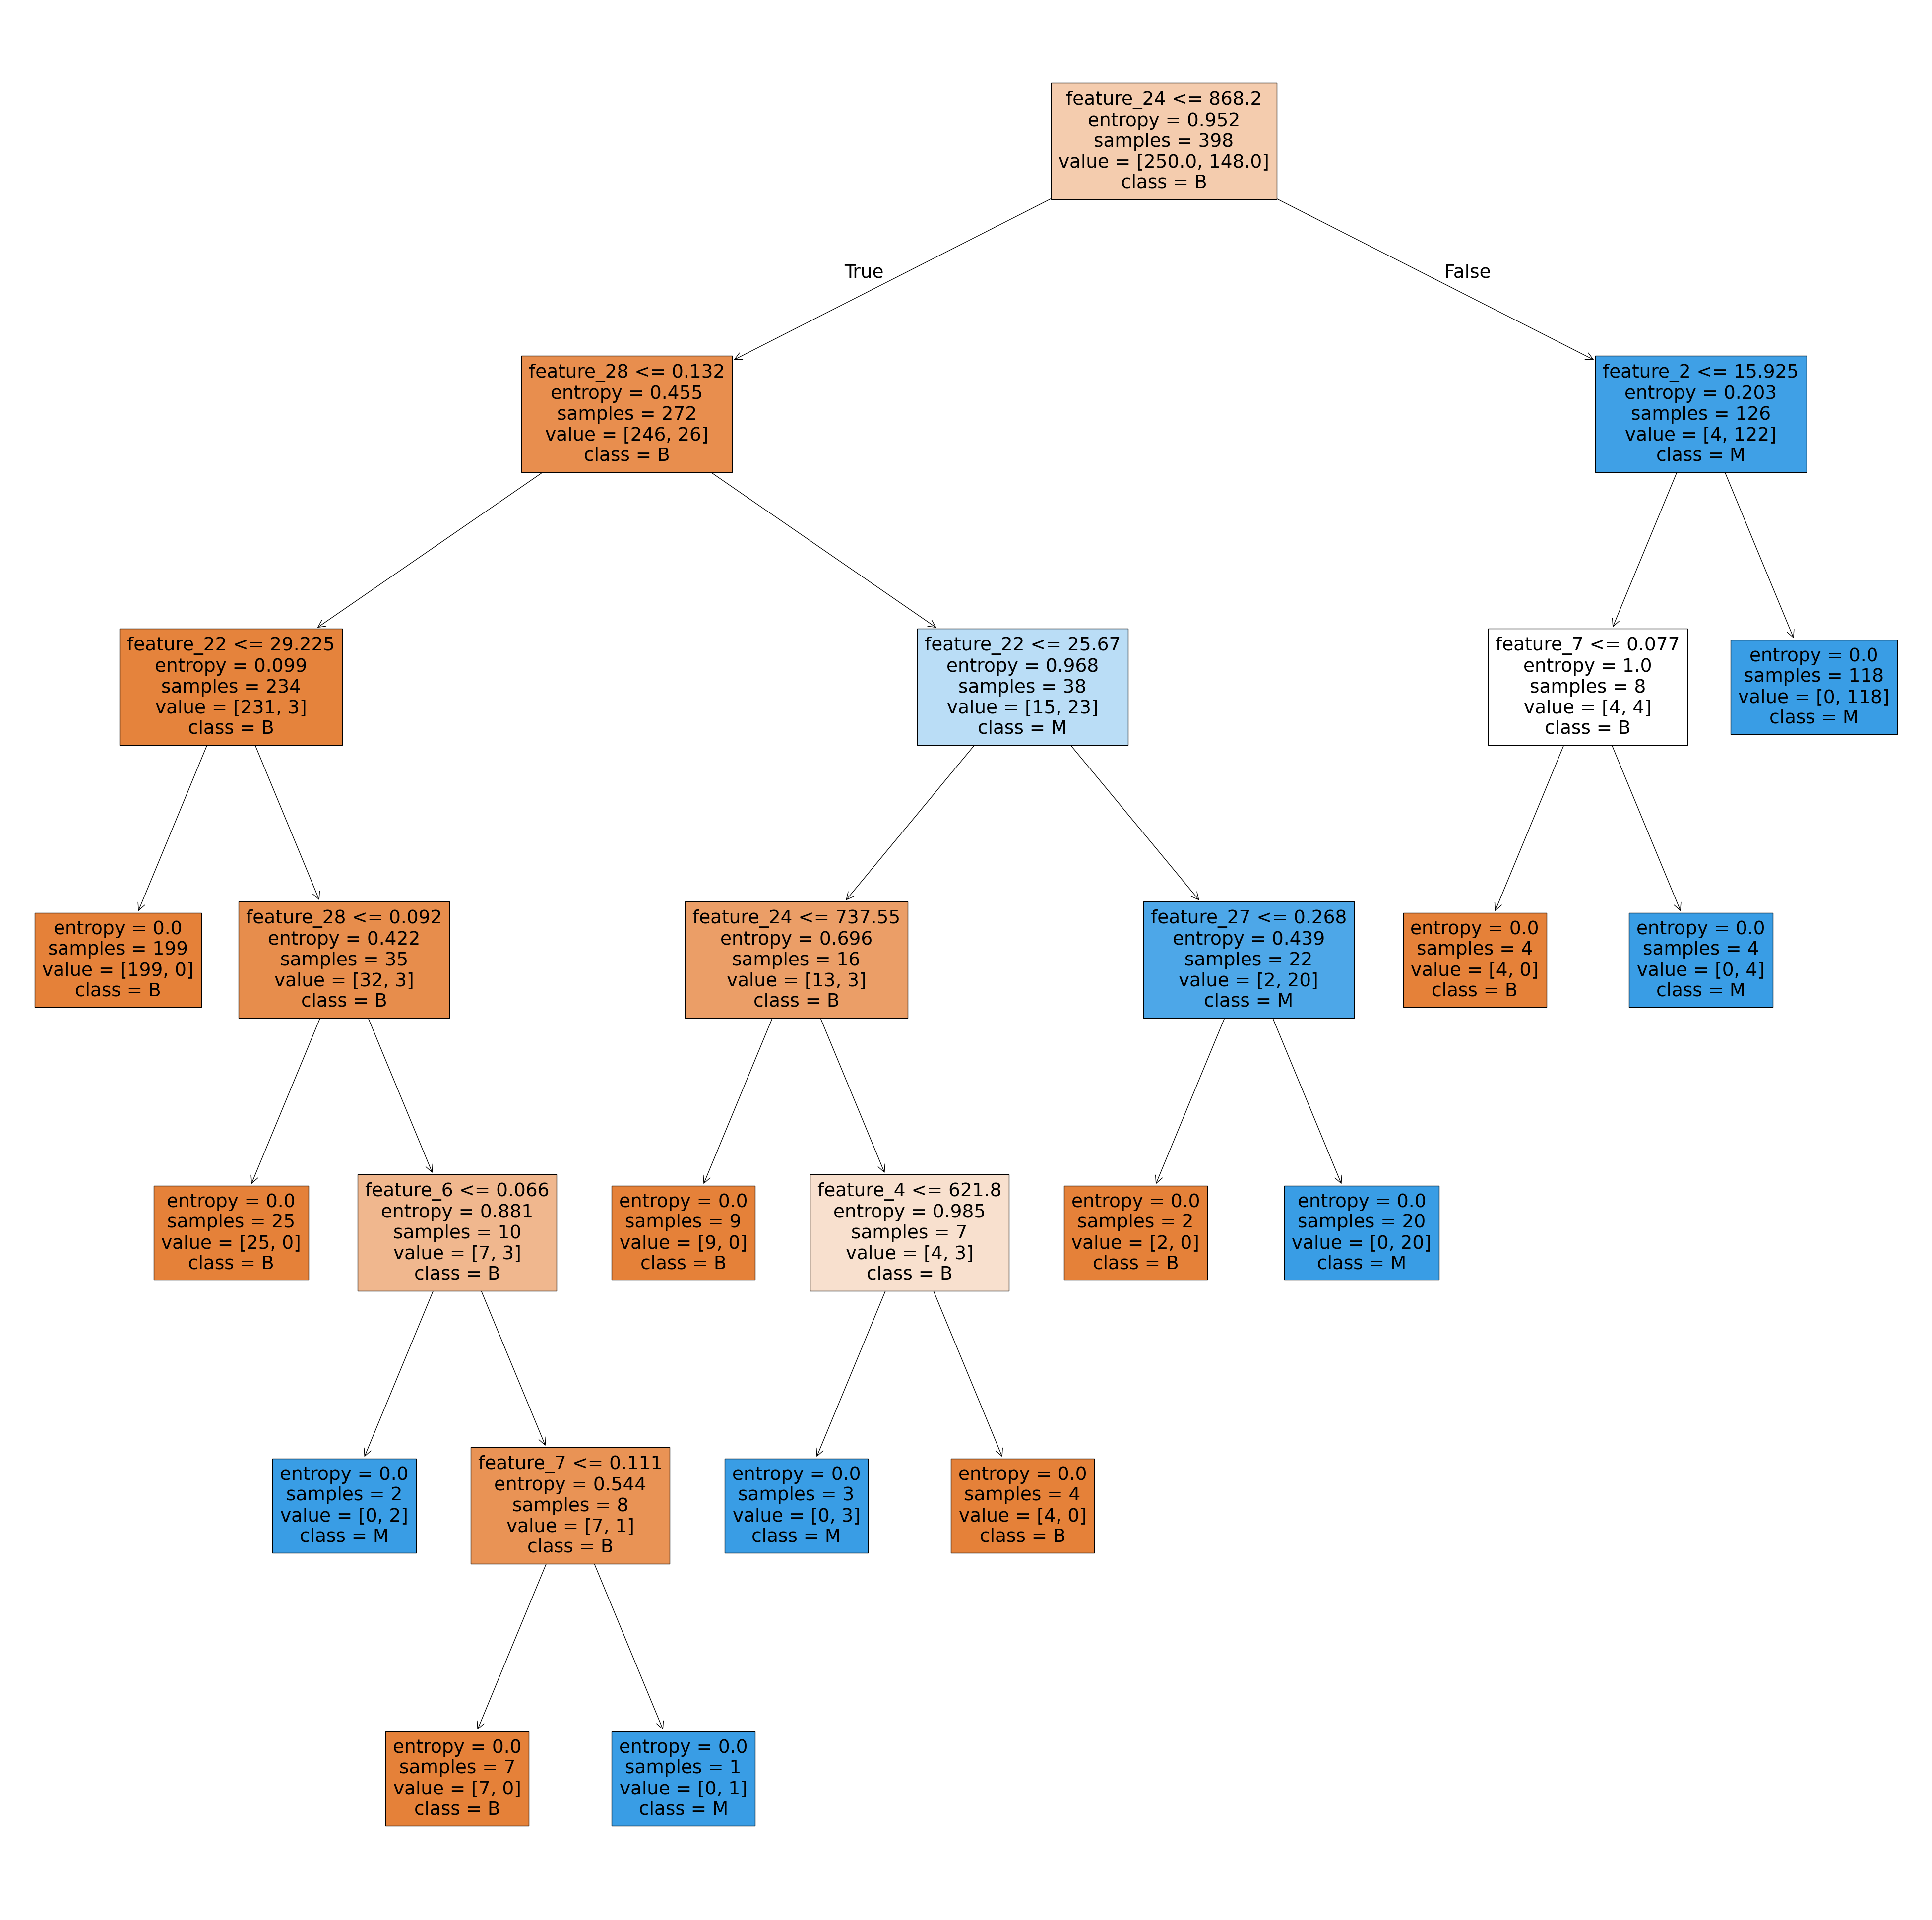

In [14]:
# Displaying decision tree with plot_tree function
fig = plt.figure(figsize=(50,50))
_ = sklearn.tree.plot_tree(model_clf, feature_names = X_train.columns, class_names = model_clf.classes_, filled = True)

Deployment

Use the predict method to make predictions

In [15]:
# Creating predict model
Y_pred = model_clf.predict(X_val)

In [16]:
# Displaying prediction
display(Y_pred)

array(['B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M'], dtype=object)

Use the accuracy_score method to calculate the performance measure of your model on the validation dataset

In [17]:
# Applying accuracy rate
accuracy = sklearn.metrics.accuracy_score(Y_val, Y_pred)
display("Accuracy (training set): {}".format(accuracy))

'Accuracy (training set): 0.9532163742690059'

Create another decision tree this time limiting its depth to 2 using the max_depth parameter and print the new decision tree

In [18]:
# New decision tree with max depth 2
model_2_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
model_2_clf.fit(X_train, Y_train)
display(model_2_clf)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [19]:
# Exporting in nice output
tree_2_text = export_text(model_2_clf, feature_names=X.columns.to_list())
print(tree_2_text)

|--- feature_24 <= 868.20
|   |--- feature_28 <= 0.13
|   |   |--- class: B
|   |--- feature_28 >  0.13
|   |   |--- class: M
|--- feature_24 >  868.20
|   |--- feature_2 <= 15.92
|   |   |--- class: B
|   |--- feature_2 >  15.92
|   |   |--- class: M



Assess the performance of the decision tree on the validation set

In [20]:
# Assessing perfromance with accuracy rate
accuracy_2 = sklearn.metrics.accuracy_score(Y_val, model_2_clf.predict(X_val))
display("Accuracy (training set): {}".format(accuracy_2))

'Accuracy (training set): 0.9122807017543859'

Save the trained model to a file using pickle

In [21]:
# 'with' automatically handles the file close
with open('Original_model.bin', 'wb') as f: pickle.dump(model_clf, f)

 Load back the saved model using pickle

In [22]:
# Loading back saved Original_model
with open('Original_model.bin', 'rb') as f:
    Original_model = pickle.load(f)

Load a dataset containing only the descriptive features so that you can make predictions for it

In [23]:
# Loading and displaying new dataset
# Dropping ID as its not requried for prediction but saving for later output display
new_dataset_NEW_model = pd.read_csv('data/Breast Cancer Wisconsin Diagnostic/wpbc.data', header=None)


columns = [
    'id', 'outcome', 'time', 'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave_points_worst', 'symmetry_worst',
    'fractal_dimension_worst', 'tumor_size', 'lymph_node_status'
]
new_dataset_NEW_model.columns = columns
droped_id_model_dataset = new_dataset_NEW_model.drop(columns=['id'])
ID_column = new_dataset_NEW_model['id']
display(droped_id_model_dataset.shape)
display(droped_id_model_dataset.columns.tolist())
display(droped_id_model_dataset.head())
display(droped_id_model_dataset.tail())

(198, 34)

['outcome',
 'time',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'tumor_size',
 'lymph_node_status']

,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
193,N,10,22.52,21.92,146.9,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.1,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,N,8,15.44,31.18,101.0,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.6,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,N,12,17.17,29.19,110.0,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.5,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,R,3,21.42,22.84,145.0,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.3,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?
197,N,6,16.70,28.13,110.3,885.4,0.08896,0.11310,0.10120,0.04989,0.1890,0.06035,0.6052,1.2350,4.243,63.91,0.007767,0.02631,0.03957,0.014110,0.01957,0.003606,19.74,34.92,128.8,1213.0,0.13300,0.2808,0.3455,0.13170,0.3035,0.08036,3.5,0


Make predictions for the data loaded and write the results out to a file

In [24]:
# Examine the target feature Class
original_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave_points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]

# Renaming columns to match the training set
renamed_features = {col: f'feature_{i+1}' for i, col in enumerate(original_columns)}

# Copy the dataset to avoid modifying the original
X_test = droped_id_model_dataset.rename(columns=renamed_features)

# Leave only the features that were used in training
X_test = X_test[list(renamed_features.values())]

# Predicting the new dataset
new_pred = model_2_clf.predict(X_test)

In [25]:
predictions = pd.DataFrame({'id': ID_column,'prediction' : new_pred})
display(predictions.head())

,id,prediction
0,119513,M
1,8423,B
2,842517,M
3,843483,M
4,843584,B


In [26]:
# Writing result out to a .csv file
predictions.to_csv('predictions.csv', index=False)

Visualization and Analysis

'Number of Misclassified Samples: 8'

,Actual,Predicted
id,,
90291,M,B
925291,B,M
909411,B,M
855133,M,B
892189,M,B


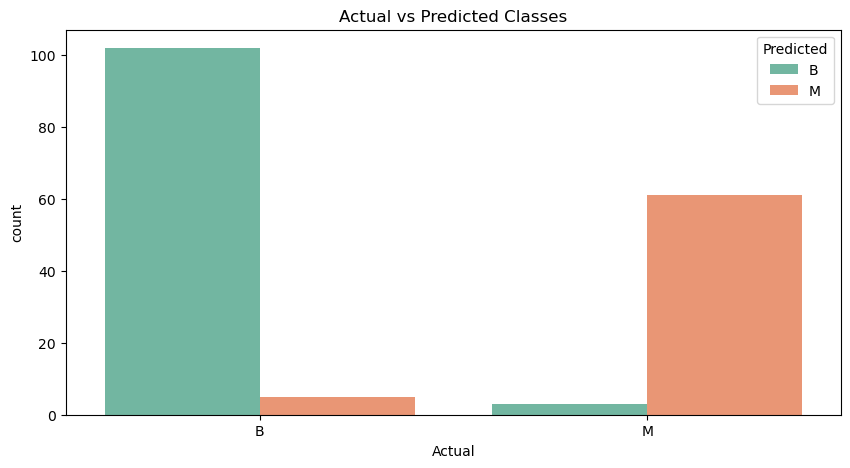

In [27]:
import seaborn as sns
# Creating new DataFrame with Actual and Predicted values from Q15
predictions = pd.DataFrame({
    'Actual': Y_val,
    'Predicted': Y_pred
})

# Display misclassified samples
misclassified = predictions[predictions['Actual'] != predictions['Predicted']]
display(f"Number of Misclassified Samples: {misclassified.shape[0]}")
display(misclassified.head())

# Plotting Actual vs Predicted results
plt.figure(figsize=(10,5))
plt.title('Actual vs Predicted Classes')
sns.countplot(x='Actual', hue='Predicted', data=predictions, palette='Set2')
plt.show()

'Components contributions:'

feature_24    0.738344
feature_28    0.205105
feature_2     0.056551
feature_1     0.000000
feature_29    0.000000
feature_27    0.000000
feature_26    0.000000
feature_25    0.000000
feature_23    0.000000
feature_22    0.000000
feature_21    0.000000
feature_20    0.000000
feature_19    0.000000
feature_18    0.000000
feature_17    0.000000
feature_16    0.000000
feature_15    0.000000
feature_14    0.000000
feature_13    0.000000
feature_12    0.000000
feature_11    0.000000
feature_10    0.000000
feature_9     0.000000
feature_8     0.000000
feature_7     0.000000
feature_6     0.000000
feature_5     0.000000
feature_4     0.000000
feature_3     0.000000
feature_30    0.000000
dtype: float64

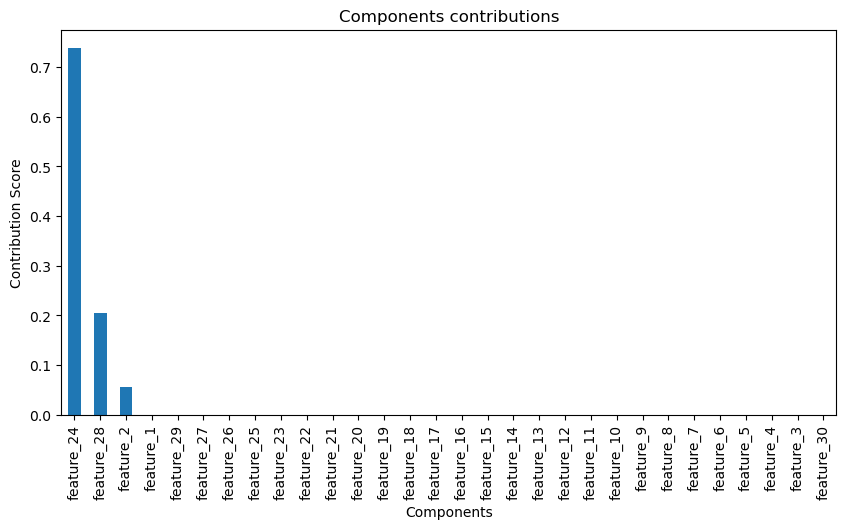

In [28]:
# Collecting components that contribute most
contributions = pd.Series(model_2_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Displaying results
display("Components contributions:")
display(contributions)
plt.figure(figsize=(10,5))
plt.title('Components contributions')
contributions.plot(kind='bar')
plt.ylabel('Contribution Score')
plt.xlabel('Components')
plt.show()

See if there is any corelation between components and target values, as well as just between components themselves.

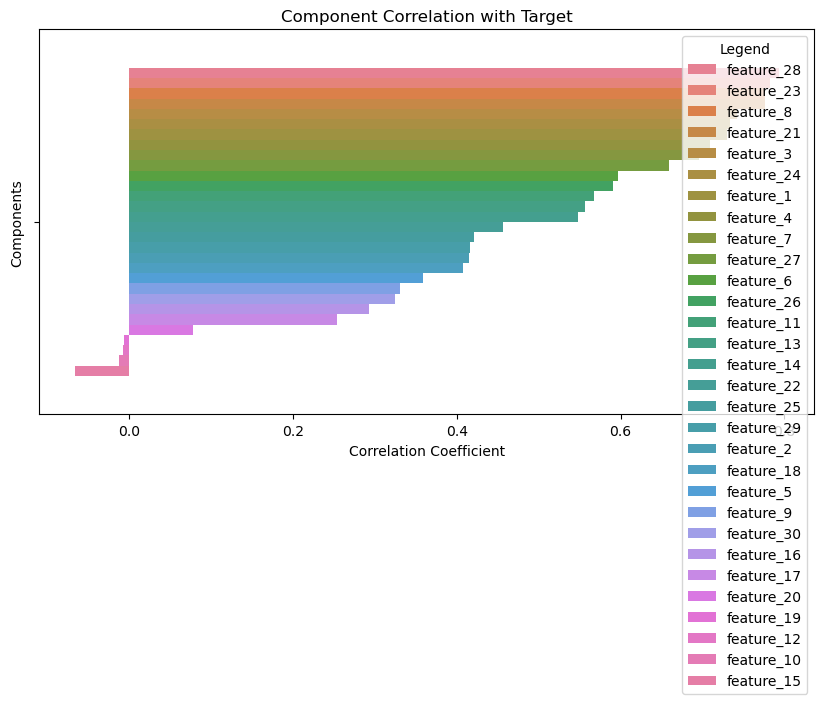

'Correlation with Target:'

feature_28    0.793566
feature_23    0.782914
feature_8     0.776614
feature_21    0.776454
feature_3     0.742636
feature_24    0.733825
feature_1     0.730029
feature_4     0.708984
feature_7     0.696360
feature_27    0.659610
feature_6     0.596534
feature_26    0.590998
feature_11    0.567134
feature_13    0.556141
feature_14    0.548236
feature_22    0.456903
feature_25    0.421465
feature_29    0.416294
feature_2     0.415185
feature_18    0.408042
feature_5     0.358560
feature_9     0.330499
feature_30    0.323872
feature_16    0.292999
feature_17    0.253730
feature_20    0.077972
feature_19   -0.006522
feature_12   -0.008303
feature_10   -0.012838
feature_15   -0.067016
dtype: float64

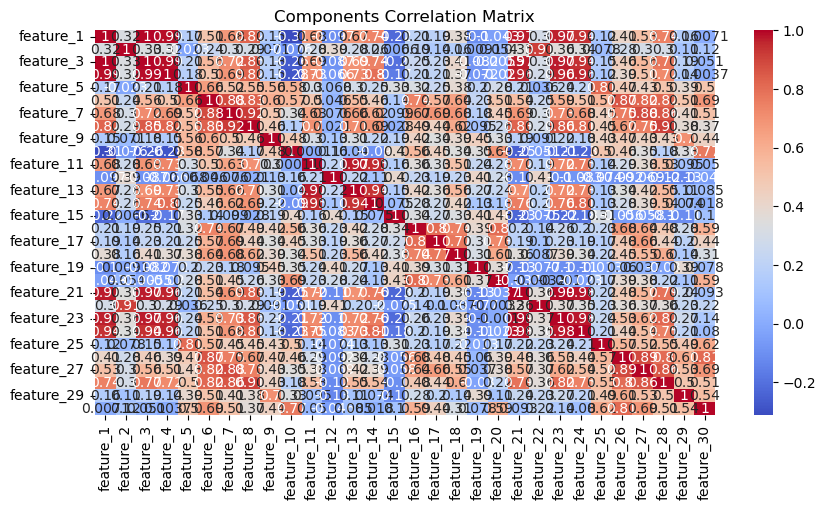

'Correlation between Components:'

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
feature_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
feature_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
feature_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
feature_4,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
feature_5,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
feature_6,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
feature_7,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
feature_8,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
feature_9,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
feature_10,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [29]:
# Transforming label strings to numbers to avoid ValueError
mapping = {'B': 0, 'M': 1}

# Apply the mapping
Y_encoded = Y.map(mapping)

# Correlating with target
correlations = X.corrwith(Y_encoded)
correlations_sorted = correlations.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.title('Component Correlation with Target')
sns.barplot(x=correlations_sorted.values, hue=correlations_sorted.index)
plt.legend(title="Legend")  
plt.xlabel('Correlation Coefficient')
plt.ylabel('Components')
plt.show()
display("Correlation with Target:", correlations.sort_values(ascending=False))

# Correlating matrix among components
plt.figure(figsize=(10, 5))
plt.title('Components Correlation Matrix')
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()
comp_corr_matrix = X.corr()
display("Correlation between Components:", comp_corr_matrix)


Cross-Validation

In [ ]:

scores = cross_val_score(model_clf, X, Y, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated scores: [0.88596491 0.92105263 0.94736842 0.94736842 0.92920354]
Mean accuracy: 0.9261915851575842


Confusion Matrix

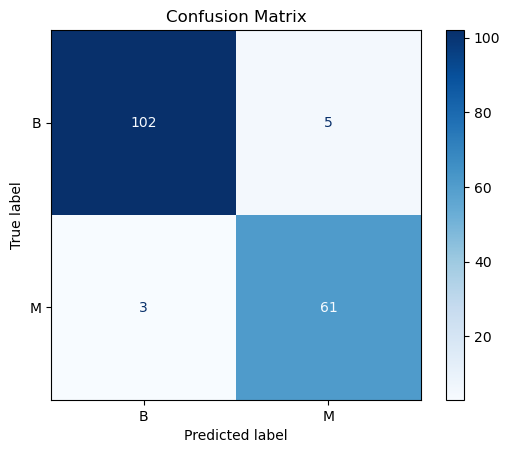

In [33]:

cm = confusion_matrix(Y_val, Y_pred, labels=model_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_clf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Simple VS Limited Tree

In [34]:
results = pd.DataFrame({
    'Model': ['Full Tree', 'Depth 2 Tree'],
    'Accuracy': [
        sklearn.metrics.accuracy_score(Y_val, model_clf.predict(X_val)),
        sklearn.metrics.accuracy_score(Y_val, model_2_clf.predict(X_val))
    ]
})
display(results)


,Model,Accuracy
0,Full Tree,0.953216
1,Depth 2 Tree,0.912281


Receiver Operating Characteristic Curve

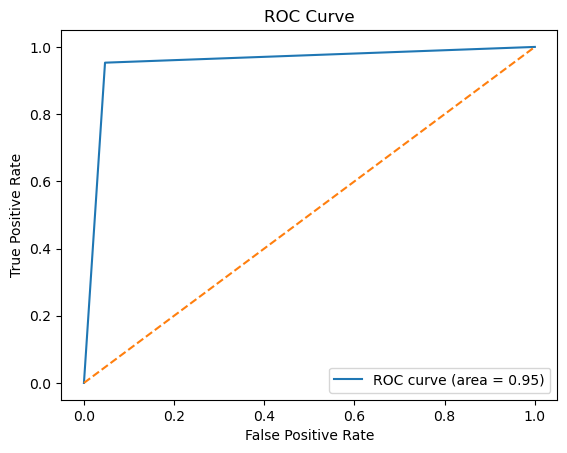

In [36]:
Y_prob = model_clf.predict_proba(X_val)[:, 1]  # Вероятности для класса 'M'
fpr, tpr, _ = roc_curve(Y_val.map({'B': 0, 'M': 1}), Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Display where model is wrong

In [39]:
wrong_preds = X_val[Y_val != Y_pred]
display(wrong_preds.head())


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90291,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,0.4157,1.627,2.914,33.01,0.008312,0.01742,0.03389,0.01576,0.017400,0.002871,15.79,31.71,102.20,758.2,0.13120,0.15810,0.26750,0.13590,0.2477,0.06836
925291,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.02982,0.05738,0.01267,0.014880,0.004738,12.48,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
909411,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,0.2574,1.376,2.806,18.15,0.008565,0.04638,0.06430,0.01768,0.015160,0.004976,12.36,26.87,90.14,476.4,0.13910,0.40820,0.47790,0.15550,0.2540,0.09532
855133,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.188,8.077,106.00,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
892189,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,0.1619,0.06287,0.6450,2.105,4.138,49.11,0.005596,0.01005,0.01272,0.01432,0.015750,0.002758,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


<Figure size 640x480 with 0 Axes>

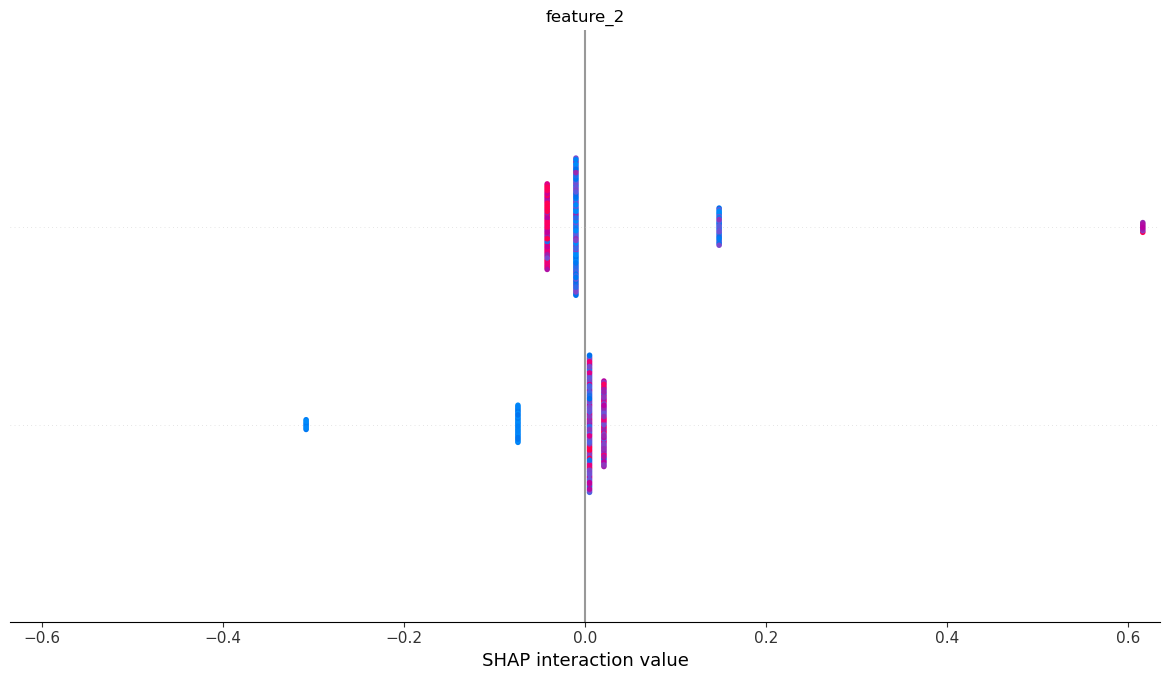

In [42]:
explainer = shap.TreeExplainer(model_2_clf)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type="bar")

### SHAP Aim:
To provide an interpretable visualization of the model's prediction for a single sample. The SHAP force plot helps explain why the model made a specific prediction by showing the contribution of each feature. This is particularly useful for understanding and debugging machine learning models, especially in critical applications like healthcare (this scenario).


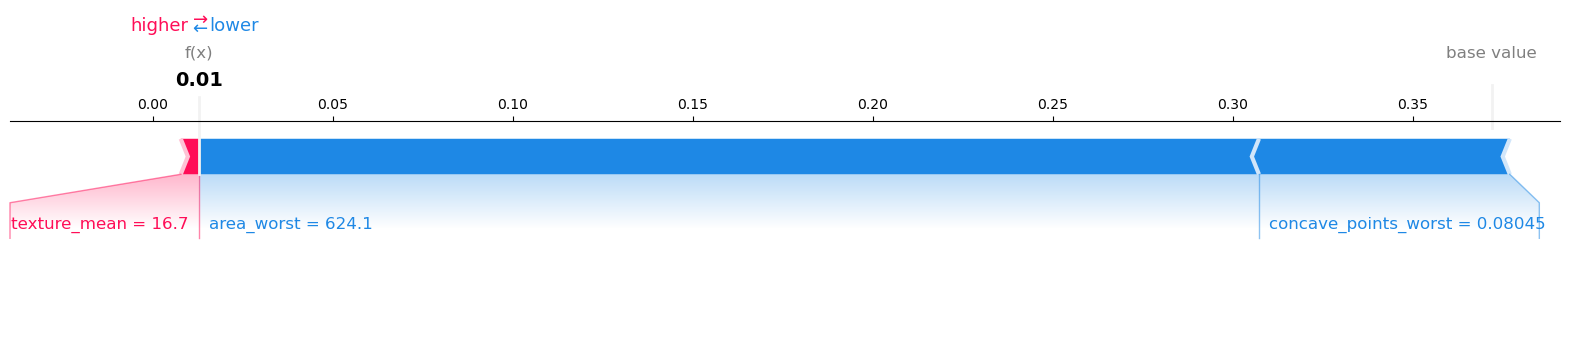

In [ ]:
real_feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

feature_mapping = {f'feature_{i+1}': real_name for i, real_name in enumerate(real_feature_names)}
X_val_named = X_val.rename(columns=feature_mapping)
row_df = X_val_named.iloc[[0]]
shap_values_single = explainer.shap_values(row_df)

if shap_values_single.ndim == 3:
    shap_row_values = shap_values_single[0, :, 1]
    base_val = explainer.expected_value[1]
else:
    shap_row_values = shap_values_single[1][0] if isinstance(shap_values_single, list) else shap_values_single[0]
    base_val = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

shap.force_plot(
    base_value=base_val,
    shap_values=shap_row_values,
    features=row_df.values[0],
    feature_names=X_val_named.columns.tolist(),
    matplotlib=True
)


Result displayed that only small ammount of feature made a real impact on the prediction.

Let's dive deep into analysis.

In [ ]:
better_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,  # или 6–10 — поэкспериментируй
    min_samples_split=5,  # чтобы избежать переобучения
    random_state=42
)
better_tree.fit(X_train, Y_train)

# сравни точность
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_val, better_tree.predict(X_val)))